# Testing

In [1]:
import sys
import pandas as pd
import yahooquery as yq
from tqdm import tqdm

In [2]:
sys.path.insert(0, '../')
from model.model import Model
import model.investor_views as views

## Model

In [3]:
num_years=100 # years
bounds=(-0.3, 1.0) # percent
gamma=0.0 # decimal
min_weight=0.05 # percent
margin_rate=0.132 # percent
long_weight=1.3 # percent
short_weight=0.3 # percent
frequency=252 # periods per year
period='max' # '1d', '5d', '7d', '60d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'
api_source='yahoo' # yahoo or bloomberg
market_symbol='SPY' # benchmark index ticker
etf_path='https://raw.githubusercontent.com/nathanramoscfa/nrcapital/main/data/etf_cape_return_forecast.csv'
stock_path='https://raw.githubusercontent.com/nathanramoscfa/nrcapital/main/data/stock_cape_return_forecast.csv'

In [4]:
def get_nrcapital_forecast(filepath, min_long_return=0.15, max_short_return=0.0):
    """
    :description: Get equity ETF data and filter ETFs by expected return
    
    :param filepath: Filepath to nrcapital forecasts
    :type filepath: str, required
    :param min_long_return: Minimum required long return, default is 0.15
    :type min_long_return: float, optional
    :param max_short_return: Maximum tolerable short return, default is 0.0
    :type max_short_return: float, optional
    :return: Selected equity ETFs
    :rtype: tuple
    """
    equity_etf_csv = pd.read_csv(r'{}'.format(filepath))
    
    selected_equity_etfs = equity_etf_csv[
        (equity_etf_csv['FWD_RETURN_FORECAST'] >= min_long_return) |
        (equity_etf_csv['FWD_RETURN_FORECAST'] <= max_short_return)
    ]

    return selected_equity_etfs

In [5]:
selected_equity_etfs = get_nrcapital_forecast(etf_path)
selected_equity_etfs

,TICKER,NAME,INDEX_NAME,CAPE,FWD_RETURN_FORECAST,LOWER_CONFIDENCE,UPPER_CONFIDENCE,F_PVALUE,INDEX_TICKER,MINIMUM_CAPE,MAXIMUM_CAPE,RSQUARED
63,OIH,VanEck Oil Services ETF,Philadelphia Stock Exchange Oil Service Sector,12.41,-0.1173,-0.3601,0.1253,0.0,OSX,6.04,58.94,0.3248
85,PSCD,Invesco S&P SmallCap Consumer Discretionary ETF,S&P 600 Consumer Discretionary Sector,12.46,0.2303,0.1165,0.3447,0.0,S6COND,9.02,30.87,0.5729
88,IJR,iShares Core S&P Small-Cap ETF,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
89,FYX,First Trust Small Cap Core AlphaDEX Fund,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
90,SLY,SPDR S&P 600 Small CapETF,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
91,SPSM,SPDR Portfolio S&P 600 Small Cap ETF,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
92,VIOO,Vanguard S&P Small-Cap 600 ETF,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
93,IJT,iShares S&P Small-Cap 600 Growth ETF,S&P Small Cap 600 Growth,22.56,0.1957,0.1232,0.2687,0.0,SMLG,14.37,45.65,0.6282
94,SLYG,SPDR S&P 600 Small Cap Growth ETF,S&P Small Cap 600 Growth,22.56,0.1957,0.1232,0.2687,0.0,SMLG,14.37,45.65,0.6282
95,VIOG,Vanguard S&P Small-Cap 600 Growth ETF,S&P Small Cap 600 Growth,22.56,0.1957,0.1232,0.2687,0.0,SMLG,14.37,45.65,0.6282


In [6]:
symbols = list(selected_equity_etfs.TICKER)

In [7]:
model = Model(
    symbols,
    num_years,
    bounds,
    gamma,
    min_weight,
    margin_rate,
    long_weight,
    short_weight,
    frequency,
    period,
    api_source,
    market_symbol
)

In [8]:
historical_prices = model.get_historical_prices()
historical_prices

symbol,OIH,PSCD,IJR,FYX,SLY,SPSM,VIOO,IJT,SLYG,VIOG,IJS,SLYV,VIOV,IUSV,IVE,SPYV,VOOV
2013-07-09,758.085876,38.561550,41.292240,38.050568,35.864754,17.094839,37.987011,46.431030,30.779146,39.808525,42.342682,34.116951,36.200138,29.965403,62.340919,16.608295,59.937019
2013-07-10,753.049866,38.525280,41.362061,38.124119,36.006992,17.145866,38.062653,46.444725,30.841764,39.858795,42.450695,34.211498,36.311974,29.890705,62.261086,16.590647,59.840996
2013-07-11,755.567810,39.005936,41.746044,38.501041,36.346806,17.145866,38.383022,46.892380,31.126518,40.105545,42.848202,34.549641,36.681892,30.314859,63.035400,16.806366,60.641346
2013-07-12,759.260864,39.042213,41.828964,38.666512,36.425819,17.485994,38.547661,47.015705,31.275976,40.379715,42.887100,34.593269,36.733501,30.370880,63.139118,16.831865,60.673340
2013-07-15,758.253723,39.114754,42.025318,38.868755,36.599678,17.568203,38.685604,47.161865,31.366856,40.461960,43.159290,34.825977,36.957165,30.490919,63.362637,16.888729,60.969482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,268.619995,85.339996,94.250000,78.419998,81.760002,36.790001,86.680000,107.739998,72.139999,92.860001,90.820000,73.870003,78.389999,71.239998,146.630005,39.340000,141.690002
2023-03-28,275.070007,85.809998,94.320000,78.330002,81.809998,36.820000,86.610001,107.559998,71.940002,92.769997,91.080002,74.110001,78.519997,71.269997,146.630005,39.349998,141.649994
2023-03-29,277.380005,86.089996,94.959999,79.190002,82.309998,37.070000,87.260002,108.239998,72.519997,93.139999,91.730003,74.639999,79.169998,72.330002,148.889999,39.959999,143.919998
2023-03-30,274.299988,86.389999,94.930000,79.070000,82.430000,37.080002,87.139999,108.150002,72.389999,93.150002,91.800003,74.620003,79.190002,72.769997,149.740005,40.169998,144.699997


In [9]:
risk_free_rate = model.get_risk_free_rate(prints=True)

------------------------------------
Risk Free Rate: 3.49%


In [10]:
market_caps = model.get_market_caps(prints=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:03<00:00,  5.02it/s]


Market Cap ($Millions):
IJR     $70,965.96
IVE     $25,099.48
SPYV    $16,012.22
IUSV    $13,053.21
IJS      $8,239.30
IJT      $5,337.29
SPSM     $5,201.33
VIOO     $4,367.23
SLYV     $4,253.76
VOOV     $3,351.99
OIH      $2,453.94
SLYG     $2,450.59
SLY      $1,803.68
VIOV     $1,439.23
FYX        $853.09
VIOG       $534.55
PSCD        $26.55
dtype: object


In [11]:
vif_symbols = model.vif_filter(historical_prices, market_caps, threshold=50, prints=True)


VIF Tickers:
TICKER
OIH      2.36
PSCD     4.10
SPYV     4.87
IJS     19.54
VIOG    22.85
SPSM    26.74
FYX     31.66
VIOV    33.67
Name: VIF Factor, dtype: float64


In [12]:
investor_views, confidences = views.investor_views_confidences(selected_equity_etfs, vif_symbols, prints=True)


Investor Views:
TICKER
IJS      23.39%
VIOV     23.39%
PSCD     23.03%
FYX      21.78%
SPSM     21.78%
VIOG     19.57%
SPYV     -0.85%
OIH     -11.73%
Name: Investor Views, dtype: object

View Confidences:
TICKER
IJS     73.60%
VIOV    73.60%
FYX     64.98%
SPSM    64.98%
VIOG    62.82%
PSCD    57.29%
SPYV    48.32%
OIH     32.48%
Name: Confidences, dtype: object


In [13]:
market_symbol, market_name, market_prices = model.get_market_prices(historical_prices, vif_symbols, prints=True)

Market Symbol: SPY
Market Name: SPDR S&P 500 ETF Trust

Market Prices:
2013-07-09    $137.96
2013-07-10    $138.01
2013-07-11    $139.89
2013-07-12    $139.95
2013-07-15    $140.48
               ...   
2023-03-24    $395.75
2023-03-27    $396.49
2023-03-28    $395.60
2023-03-29    $401.35
2023-03-30    $403.70
Name: SPDR S&P 500 ETF Trust, Length: 2450, dtype: object


In [14]:
market_implied_risk_aversion = model.market_implied_risk_aversion(market_prices, risk_free_rate, prints=True)


Market Implied Risk Aversion:
Delta: 2.94


In [15]:
covariance_matrix = model.calculate_covariance_matrix(historical_prices, vif_symbols, prints=True)


Covariance Matrix:
symbol     OIH    PSCD     FYX    SPSM    VIOG     IJS    VIOV    SPYV
symbol                                                                
OIH     0.1776  0.0587  0.0670  0.0610  0.0553  0.0656  0.0661  0.0474
PSCD    0.0587  0.0743  0.0538  0.0509  0.0505  0.0506  0.0519  0.0331
FYX     0.0670  0.0538  0.0545  0.0499  0.0493  0.0493  0.0509  0.0349
SPSM    0.0610  0.0509  0.0499  0.0489  0.0468  0.0463  0.0479  0.0330
VIOG    0.0553  0.0505  0.0493  0.0468  0.0481  0.0446  0.0464  0.0323
IJS     0.0656  0.0506  0.0493  0.0463  0.0446  0.0495  0.0486  0.0323
VIOV    0.0661  0.0519  0.0509  0.0479  0.0464  0.0486  0.0507  0.0335
SPYV    0.0474  0.0331  0.0349  0.0330  0.0323  0.0323  0.0335  0.0293


In [16]:
posterior_covariance_matrix, posterior_expected_returns = model.calculate_black_litterman(
    covariance_matrix,
    market_prices, 
    risk_free_rate, 
    market_caps, 
    vif_symbols, 
    investor_views,
    confidences, 
    prints=True
)

Delta:
2.94

Prior Expected Returns:
symbol
OIH     22.40%
FYX     16.48%
PSCD    16.22%
VIOV    16.10%
IJS     15.87%
SPSM    15.77%
VIOG    15.33%
SPYV    12.97%
dtype: object

Posterior Expected Returns:
symbol
PSCD    22.41%
FYX     20.56%
VIOV    20.31%
IJS     20.21%
SPSM    19.74%
VIOG    19.36%
OIH     18.92%
SPYV    12.57%
dtype: object


In [17]:
min_volatility, min_weights, min_results = model.minimum_risk_portfolio(
    posterior_expected_returns, posterior_covariance_matrix, risk_free_rate, prints=True
)

Minimum Risk Portfolio:
Minimum Volatility: 16.36%

Weights:
SPYV    100.00%
IJS      29.93%
OIH     -13.59%
FYX     -16.41%
Name: Minimum Risk Portfolio, dtype: object

Results:
Expected_Return         8.72%
Expected Volatility    16.36%
Sharpe_Ratio           0.5622
Name: Results, dtype: object

Long/Short Ratio:
Portfolio weights sum: 99.93%
Long weights sum: 129.93%
Short weights sum: -30.0%


In [18]:
max_volatility, max_weights, max_results = model.maximum_risk_portfolio(
    posterior_expected_returns, posterior_covariance_matrix, risk_free_rate, prints=True
)

Maximum Risk Portfolio:
Maximum Volatility: 29.83%

Weights:
PSCD    100.00%
FYX      30.00%
SPYV    -30.00%
Name: Maximum Risk Portfolio, dtype: object

Results:
Expected_Return        20.85%
Expected Volatility    29.83%
Sharpe_Ratio           0.7147
Name: Results, dtype: object

Long/Short Ratio:
Portfolio weights sum: 100.0%
Long weights sum: 130.0%
Short weights sum: -30.0%


In [19]:
max_sharpe_weights, max_sharpe_results = model.maximum_sharpe_portfolio(
    posterior_expected_returns, posterior_covariance_matrix, risk_free_rate, prints=True
)


Maximum Sharpe Portfolio:
Sharpe Ratio: 0.799

Weights:
IJS      67.82%
VIOV     33.76%
SPSM     17.52%
PSCD     10.89%
SPYV    -14.52%
OIH     -15.48%
Name: Maximum Sharpe Portfolio, dtype: object

Results:
Expected_Return        17.76%
Expected Volatility    22.81%
Sharpe_Ratio            0.799
Name: Results, dtype: object

Long/Short Ratio:
Portfolio weights sum: 99.99%
Long weights sum: 129.99%
Short weights sum: -30.0%


C:\Users\25del\anaconda3\envs\etradebot\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:257: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


In [20]:
portfolios, results = model.efficient_frontier_portfolios(
    posterior_expected_returns, posterior_covariance_matrix, risk_free_rate, prints=False
)
portfolios

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.56it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
TICKER,,,,,,,,,,,,,,,,,,,,
OIH,-0.1457,-0.1549,-0.1594,-0.1641,-0.1682,-0.1721,-0.1758,-0.1793,-0.1846,-0.1587,-0.1200,-0.0840,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PSCD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1003,0.1856,0.2595,0.3285,0.3914,0.4980,0.6176,0.7210,0.8163,0.9059,0.9899
FYX,-0.1543,-0.1451,-0.1406,-0.1359,-0.1318,-0.1279,-0.1242,-0.1207,0.0000,0.0000,0.0541,0.1086,0.1272,0.1442,0.1780,0.2174,0.2514,0.2812,0.2847,0.2880
SPSM,0.0000,0.0000,0.0574,0.0922,0.1229,0.1516,0.1784,0.2040,0.2127,0.1839,0.0703,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
VIOG,0.0000,0.0000,0.0632,0.0706,0.0772,0.0833,0.0891,0.0946,0.0575,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
IJS,0.3492,0.5222,0.5869,0.6147,0.6393,0.6623,0.6838,0.7042,0.7116,0.6823,0.6360,0.5886,0.5377,0.4914,0.4182,0.3380,0.2686,0.2025,0.1094,0.0000
VIOV,0.0000,0.0000,0.0000,0.0766,0.1301,0.1801,0.2270,0.2716,0.2878,0.3335,0.3540,0.3434,0.3066,0.2730,0.2058,0.1270,0.0590,0.0000,0.0000,0.0000
SPYV,0.9508,0.7259,0.5650,0.4310,0.3129,0.2025,0.0990,0.0000,-0.0822,-0.1413,-0.1800,-0.2160,-0.2532,-0.2871,-0.3000,-0.3000,-0.3000,-0.3000,-0.3000,-0.3000


In [21]:
results

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Expected_Return,0.1268,0.1434,0.1551,0.1650,0.1737,0.1819,0.1895,0.1968,0.2044,0.2101,0.2150,0.2193,0.2240,0.2267,0.2297,0.2322,0.2345,0.2366,0.2385,0.2403
Expected Volatility,0.1646,0.1716,0.1786,0.1856,0.1925,0.1995,0.2065,0.2135,0.2205,0.2275,0.2344,0.2414,0.2484,0.2554,0.2624,0.2694,0.2763,0.2833,0.2903,0.2973
Sharpe_Ratio,0.5825,0.6583,0.7003,0.7290,0.7497,0.7656,0.7779,0.7876,0.7949,0.7990,0.7972,0.7923,0.7857,0.7782,0.7697,0.7596,0.7491,0.7381,0.7272,0.7163


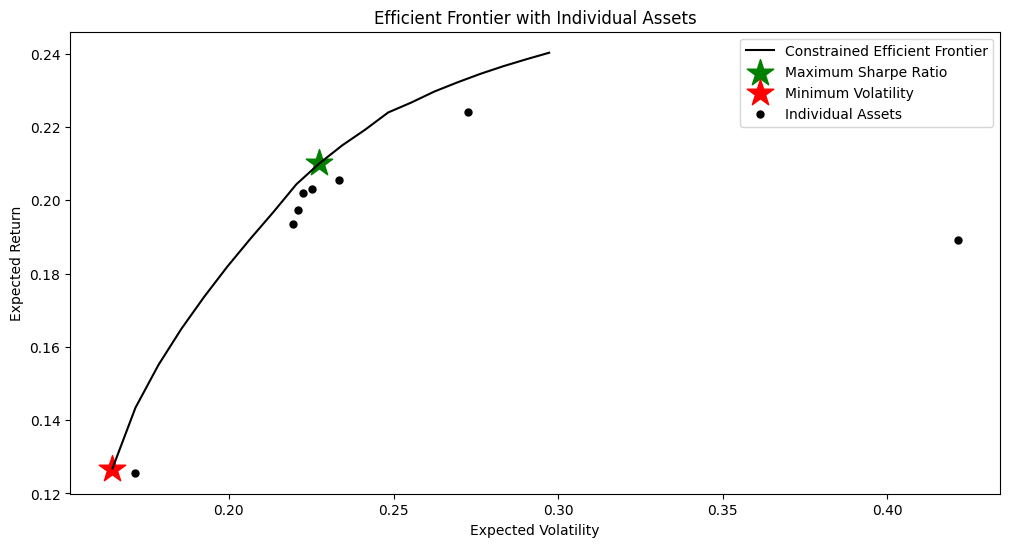

In [22]:
model.plot_efficient_frontier(posterior_expected_returns, results, covariance_matrix, figsize=(12, 6))

In [23]:
# max_sharpe_weights.to_csv('new_portfolio.csv')

In [24]:
max_sharpe_weights

IJS     0.6782
VIOV    0.3376
SPSM    0.1752
PSCD    0.1089
SPYV   -0.1452
OIH    -0.1548
Name: Maximum Sharpe Portfolio, dtype: float64